<img src="logo.jpg" />

## [Pedram Jahangiry, Fall 2019](www.pedramjahangiry.com) 

# Decision Trees and Random Forest (Classification) 

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
df.describe(include='all')

User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000

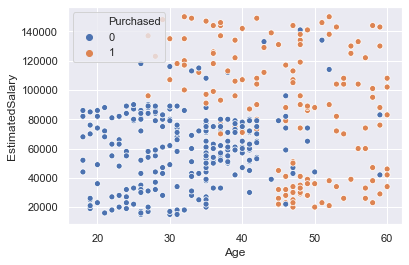

In [7]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

## Data preprocessing 

In [8]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.drop('User ID',axis=1, inplace=True)

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [12]:
df = df[['Purchased','Age', 'EstimatedSalary', 'Gender_Male']]

In [13]:
df.head()

Purchased  Age  EstimatedSalary  Gender_Male
0          0   19            19000            1
1          0   35            20000            1
2          0   26            43000            0
3          0   27            57000            0
4          0   19            76000            1

## Data visualization 

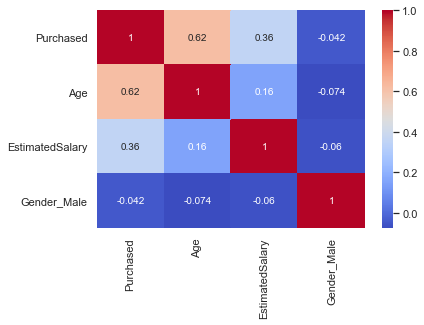

In [14]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

C:\Users\jahan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jahan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


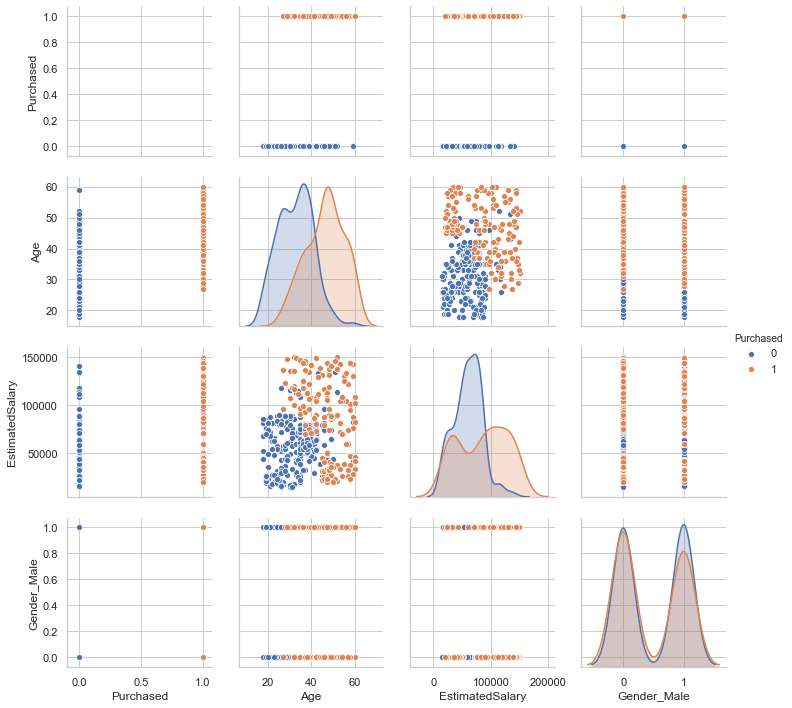

In [15]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Purchased')

### Defining the variables and splitting the data

In [16]:
y = df['Purchased']
X = df.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [17]:
X_train.head()

Age  EstimatedSalary  Gender_Male
269   40            61000            1
389   48            35000            0
232   40           107000            1
89    35            50000            1
236   40            57000            1

## Scaling the features: 
For trees and random forests, there is no need to scale the features! (No distance metrics is used)

###  RF Classification with Sklearn

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Fitting RF classifier to the Training set

RF_classifier = RandomForestClassifier(n_estimators = 1000, criterion='gini', max_features='sqrt', random_state=rand_state)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1000,
                       verbose=0, warm_start=False)

* n_estimators : is the number of trees. Note that in Bagging and RF, increasing # of trees will NOT lead to overfitting. (However in boosting it does!)
* Criterion: is the quality of your split using entropy, gini and etc
* max_features : m=sqrt(p)

In [20]:
# Predicting the Test set results
y_pred_test = RF_classifier.predict(X_test)

### the Confusion Matrix 

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(y_test, y_pred_test))

[[44  4]
 [ 6 26]]


In [23]:
# defining our own confusion matrix function
from sklearn.metrics import confusion_matrix
def my_confusion_matrix(y, y_hat):
    cm = confusion_matrix(y, y_hat)
    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    accuracy = round((TP+TN) / (TP+ FP+ FN+ TN) ,2)
    precision = round( TP / (TP+FP),2)
    recall = round( TP / (TP+FN),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : 0 ','Actual : 1'], columns=['Predict : 0','Predict :1 '])
    print('\n')
    print('Accuracy = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall = {}'.format(recall))
    print("-----------------------------------------")
    return cm_labled
 

In [24]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted red, how many are actually red (incorporating FP: type I error)
# recall: how many of the red dots we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_pred_test)



Accuracy = 0.88
Precision = 0.87
Recall = 0.81
-----------------------------------------


Predict : 0  Predict :1 
Actual : 0            44            4
Actual : 1             6           26

###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
# remember we saved our model in an object called "RF_classifier"
accuracy = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10 , scoring="accuracy" )

In [27]:
accuracy

array([0.90909091, 0.875     , 0.96875   , 0.84375   , 0.90625   ,
       0.90625   , 0.90625   , 0.875     , 0.84375   , 0.80645161])

In [28]:
round(accuracy.mean(),3)

0.884

In [29]:
round(accuracy.std(),3)

0.043

# Gridsearch



In [30]:
RandomForestClassifier

sklearn.ensemble.forest.RandomForestClassifier

In [31]:
param_grid = {'max_depth': [5,10,20], 'criterion': ['entropy','gini'], 'max_features':['log2','sqrt']} 

In [32]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like RF, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [33]:
grid = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=100),param_grid,refit=True,verbose=0, cv=5)

what refit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting. 


In [34]:
# May take awhile!
grid.fit(X_train,y_train)

C:\Users\jahan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'cr

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [35]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}

In [36]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

You can use the **grid.predict** directly to see the resutls with using the best parameters.

In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
my_confusion_matrix(y_test,grid_predictions)



Accuracy = 0.9
Precision = 0.88
Recall = 0.88
-----------------------------------------


Predict : 0  Predict :1 
Actual : 0            44            4
Actual : 1             4           28

## Feature Importance Measure

In [39]:
features= list(X_train.columns)
features

['Age', 'EstimatedSalary', 'Gender_Male']

In [40]:
RF_classifier = RandomForestClassifier(n_estimators = 100, max_features='log2', max_depth=5, criterion='entropy')
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
importances= RF_classifier.feature_importances_
importances

array([0.52593783, 0.4655046 , 0.00855757])

In [42]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importances})
FIM=FIM.sort_values(by=['Feature_importance'])
FIM

Features  Feature_importance
2      Gender_Male            0.008558
1  EstimatedSalary            0.465505
0              Age            0.525938

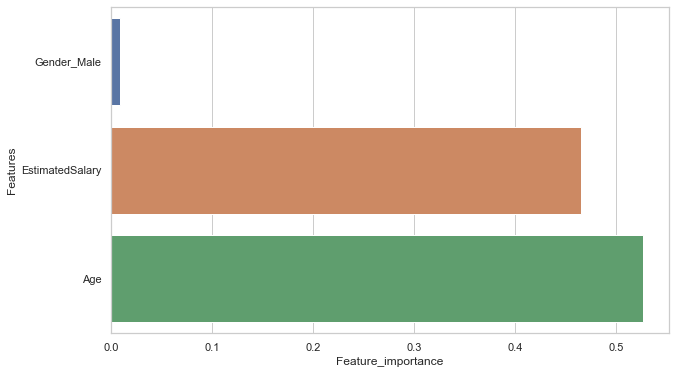

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(y='Features', x='Feature_importance', data=FIM)

Comparing **RF** with logistic regression, KNN and SVM regression: 

* Accuracy_test_RF  = 0.90 (with max_depth=5, max_features=**log2**, n_estimators= 100, criterion=**entropy**)
* Accuracy_test_SVC = 0.90 (with C=10, gamma=1, kernel=**rbf**)
* Accuracy_test_Logistic = 0.82
* Accuracy_test_KNN = 0.92 (with k=6)

---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [44]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [45]:
# Feature Scaling: only for visualization purposes we need to scale the features. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting Decision Tree classifier to the Training set

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=1)
tree_classifier.fit(X_train, y_train.values.reshape(-1,))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
# Predicting the Test set results
y_pred = tree_classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


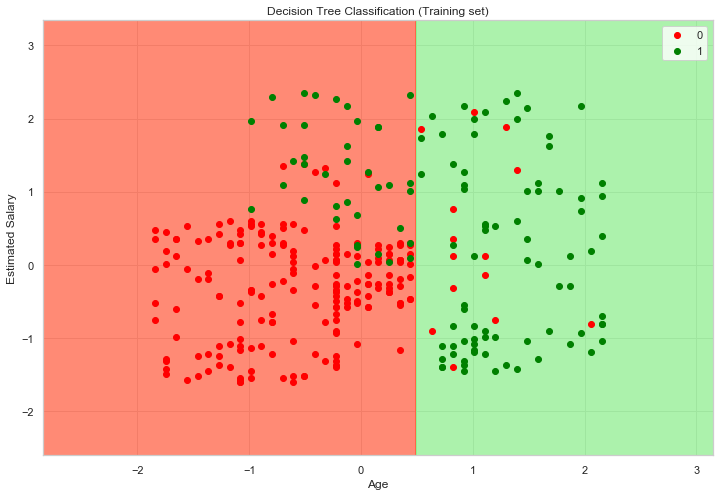

In [49]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , tree_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Exercise
1. If you use max_depth=100, what is the accuracy in the training set? 
2. Try to use randomforest classifier instead of decision tree and visualize the boundaries. If you use max_depth = 1, you wont' see an exact vertical or horizontal line as your separating boundary. why?


### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


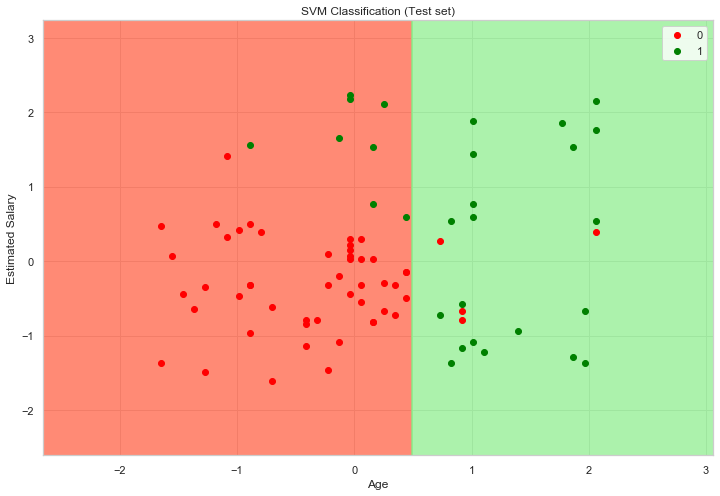

In [50]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, tree_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [51]:
print(confusion_matrix(y_test, y_pred))

[[48  4]
 [ 8 20]]


In [52]:
# Accuracy: what percentage of the total dots did we predict correctly?
# precision: among the ones that we predicted green (positive), how many are actually green (incorporating FP: type I error)
# recall: how many of the Green dots (True positives) we predicted correctly (incorporating FN: type II error)
my_confusion_matrix(y_test,y_pred)



Accuracy = 0.85
Precision = 0.83
Recall = 0.71
-----------------------------------------


Predict : 0  Predict :1 
Actual : 0            48            4
Actual : 1             8           20

---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py